In [13]:
%pylab inline
import clustering.edit as cl
import estimation.estimation as est
import simpleDataImporter as dataImp
import analysis.analysis as ana

Populating the interactive namespace from numpy and matplotlib


Import data.

In [14]:
filename = 'data/MCMM/example_1.dat'
data_importer = dataImp.SimpleDataImporter(filename, i_delimiter=' ')

Plot of the distribution of the sample 

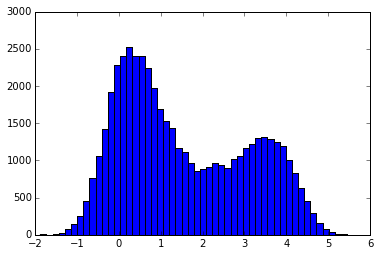

In [15]:
data = data_importer.get_data()
if 1 < data.shape[1]:
    # plt.plot(data[:, 0], data[:, 1])
    plt.scatter(data[:, 0], data[:, 1])
    # plt.hist2d(data[:, 0], data[:, 1], bins=50)
else:
    plt.hist(data, bins=50)
plt.show()

**K-means clustering**

In [7]:
k = 5
cluster = cl.kMeans(data, k)
cluster.discretize()

Space for k-means plots.

**Estimation of transition matrix**

In [10]:
chain = np.asarray(cluster.get_labels(), dtype=np.int64)
count_mat = est.compute_count_matrix(chain, i_tau=1)
trans_mat = est.estimate_transition_matrix(count_mat, 10000, 1e-3)

Plot of $\Pi T$ with $\Pi = diag(\pi)$ and with stationary distribution $\pi$.

In [12]:
is_reversible, check_mat = est.check_reversibility(trans_mat)
plt.matshow(check_mat)
plt.show()

**Analysis of markov chain and transition matrix**

In [21]:
mcmm_ana = ana.MarkovModel(trans_mat)